In [1]:
import os

from os.path import join as pjoin

import numpy as np

import pandas as pd

from load_data_TCN import *

from TCN import *

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

import time

from sklearn.model_selection import train_test_split

In [6]:
start = time.clock()
input_dir = 'G:\\geoeast\\F3-data\\TCN_intepretation\\prevision_data\\train_100\\image\\'
mask_dir = 'G:\\geoeast\\F3-data\\TCN_intepretation\\prevision_data\\train_100\\mask\\'
seismic = seismic_data(input_dir)
mask = seismic_data(mask_dir)
x_tra, y_tra = train_val_split(seismic,mask)
x_tra, x_valid, y_tra, y_valid = train_test_split(x_tra,y_tra,test_size=0.15,random_state=2021)
print(x_tra.shape, x_valid.shape, y_tra.shape, y_valid.shape)
model = TCN()
callbacks = [EarlyStopping(patience=5, verbose=1),ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1),
    ModelCheckpoint('TCN_image_100.h5', verbose=1, save_best_only=True, save_weights_only=True)]


train=model.fit(x=x_tra,y=y_tra,batch_size=72,epochs=100,validation_data=(x_valid, y_valid),shuffle=True,callbacks=callbacks)

end = time.clock()
run_time = end-start
print('运行时间',run_time)

F:\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


(462, 13167)
(462, 13167)
(13167, 462) (13167, 462, 10)
(11191, 462) (1976, 462) (11191, 462, 10) (1976, 462, 10)
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 462, 1)]     0                                            
__________________________________________________________________________________________________
weight_normalization_24 (Weight (None, 462, 64)      1345        input_3[0][0]                    
__________________________________________________________________________________________________
activation_36 (Activation)      (None, 462, 64)      0           weight_normalization_24[0][0]    
__________________________________________________________________________________________________
dropout_24 (Dropout)            (None, 462, 64)      0           activation_3

156/156 [==============================] - ETA: 0s - loss: 0.6358 - categorical_accuracy: 0.7943
Epoch 00001: val_loss improved from inf to 0.20278, saving model to TCN_image_100.h5
156/156 [==============================] - 25s 161ms/step - loss: 0.6358 - categorical_accuracy: 0.7943 - val_loss: 0.2028 - val_categorical_accuracy: 0.9284 - lr: 0.0010
Epoch 2/100
156/156 [==============================] - ETA: 0s - loss: 0.2205 - categorical_accuracy: 0.9214
Epoch 00002: val_loss improved from 0.20278 to 0.14442, saving model to TCN_image_100.h5
156/156 [==============================] - 24s 151ms/step - loss: 0.2205 - categorical_accuracy: 0.9214 - val_loss: 0.1444 - val_categorical_accuracy: 0.9504 - lr: 0.0010
Epoch 3/100
156/156 [==============================] - ETA: 0s - loss: 0.1583 - categorical_accuracy: 0.9437
Epoch 00003: val_loss improved from 0.14442 to 0.10726, saving model to TCN_image_100.h5
156/156 [==============================] - 25s 157ms/step - loss: 0.1583 - categ

Epoch 24/100
156/156 [==============================] - ETA: 0s - loss: 0.0470 - categorical_accuracy: 0.9833
Epoch 00024: val_loss improved from 0.04904 to 0.04819, saving model to TCN_image_100.h5
156/156 [==============================] - 23s 149ms/step - loss: 0.0470 - categorical_accuracy: 0.9833 - val_loss: 0.0482 - val_categorical_accuracy: 0.9847 - lr: 0.0010
Epoch 25/100
156/156 [==============================] - ETA: 0s - loss: 0.0457 - categorical_accuracy: 0.9836
Epoch 00025: val_loss improved from 0.04819 to 0.04667, saving model to TCN_image_100.h5
156/156 [==============================] - 23s 150ms/step - loss: 0.0457 - categorical_accuracy: 0.9836 - val_loss: 0.0467 - val_categorical_accuracy: 0.9849 - lr: 0.0010
Epoch 26/100
156/156 [==============================] - ETA: 0s - loss: 0.0443 - categorical_accuracy: 0.9839
Epoch 00026: val_loss improved from 0.04667 to 0.04413, saving model to TCN_image_100.h5
156/156 [==============================] - 24s 157ms/step - l

F:\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  app.launch_new_instance()


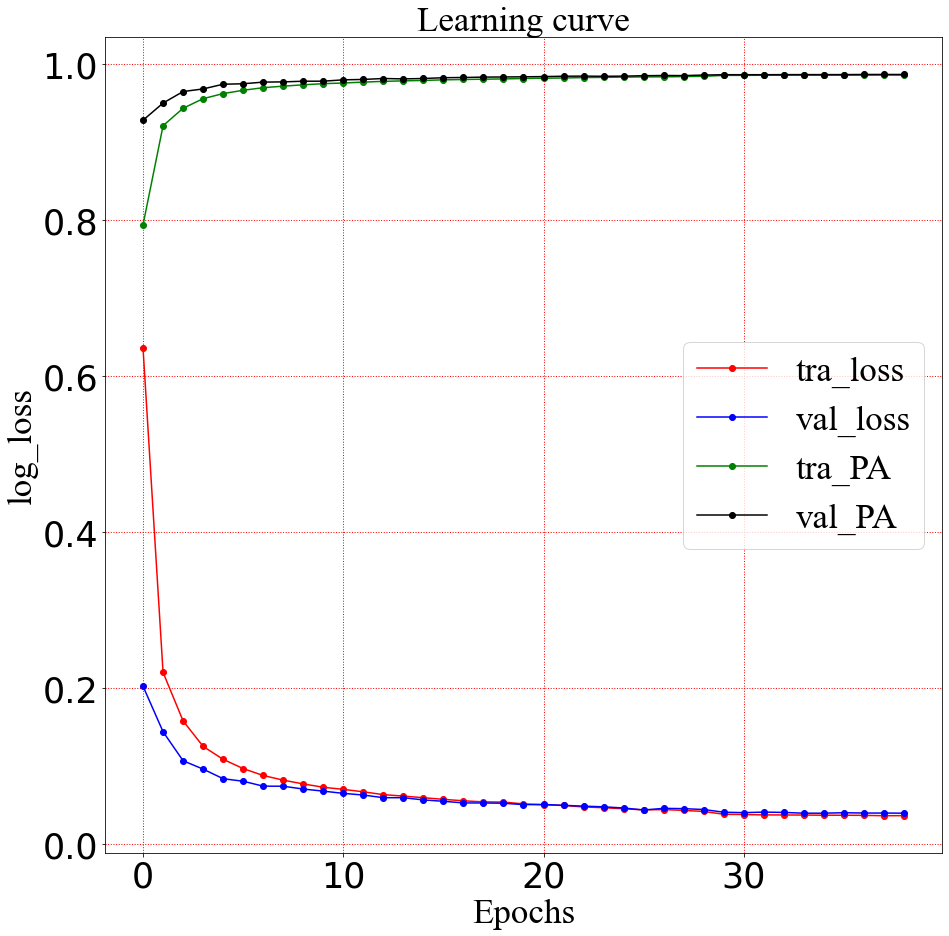

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
size = 35

a,=plt.plot(train.history["loss"], 'go-',label='tra_loss',color = 'r')
b,=plt.plot(train.history["val_loss"], 'go-',label='val_loss',color = 'b')
c,=plt.plot(train.history["categorical_accuracy"], 'go-',label='tra_PA',color = 'g')
d,=plt.plot(train.history["val_categorical_accuracy"], 'go-',label='val_PA',color = 'k')


#设置图例并设置图例的字体及大小
font1 = {'family': 'Times New Roman','weight': 'normal','size': size,}
plt.legend(handles=[a,b,c,d], prop=font1)

#设置坐标轴刻度值以及刻度值的字体
plt.tick_params(labelsize=size)


#设置横纵坐标、标题名称以及对应字体格式
font2 = {'family': 'Times New Roman','weight': 'normal','size': size,}
plt.xlabel('Epochs', font2)
plt.ylabel("log_loss", font2)
plt.title("Learning curve",font2)

plt.grid(linestyle = ':',color = 'r',linewidth=1)
plt.savefig('D:\\jupyter-work\\TCN_sismic_interpretation\\TCN_5-5\\TCN_mulitclass\\photo\\TCN_tian_loss.jpg',dpi=300)
# plt.legend()
plt.show()

In [8]:
import os
import xlwt
import xlrd
import pandas as pd
import math

book = xlwt.Workbook(encoding='utf-8',style_compression=0)
sheet = book.add_sheet('cruel', cell_overwrite_ok=True)
sheet.write(0, 0, 'Epoch')
sheet.write(0, 1, 'Loss')
sheet.write(0, 2, 'Val_loss')
sheet.write(0, 3, 'Acc')
sheet.write(0, 4, 'Val_acc')
# sheet.write(0, 5, 'Precision')
# sheet.write(0, 6, 'Val_Precison')
# sheet.write(0, 7, 'Recall')
# sheet.write(0, 8, 'Val_recall')
# sheet.write(0, 9, 'M_F1')
# sheet.write(0, 10, 'Val_m_f1')

n=0
row=39

while n<row:
    sheet.write(n+1,0,n+1)#vp名称
    sheet.write(n+1,1,train.history['loss'][n])
    sheet.write(n+1,2,train.history['val_loss'][n])
    sheet.write(n+1,3,str(train.history['categorical_accuracy'][n]))
    sheet.write(n+1,4,train.history['val_categorical_accuracy'][n])
#     sheet.write(n+1,5,train.history['precision'][n])
#     sheet.write(n+1,6,train.history['val_precision'][n])
#     sheet.write(n+1,7,train.history['recall'][n])
#     sheet.write(n+1,8,train.history['val_recall'][n])
#     sheet.write(n+1,9,train.history['fmeasure'][n])
#     sheet.write(n+1,10,train.history['val_fmeasure'][n]) 
    n=n+1
book.save('D:\\jupyter-work\\TCN_sismic_interpretation\\TCN_5-5\\TCN_mulitclass\\photo\\loss_curve.xls')

In [5]:
test_path = 'D:\\jupyter-work\\TCN_sismic_interpretation\\TCN_5-5\\TCN_mulitclass\\results\\random\\image\\tif\in\\'
save_path = 'D:\\jupyter-work\\TCN_sismic_interpretation\\TCN_5-5\\TCN_mulitclass\\results\\random\\pre\\gray\\'
args = 6 #训练集数量

test = testGenerator(test_path)

###模型预测###
model = TCN()
model.load_weights('TCN_image_100.h5')

# model_pre = model.predict(test,21,verbose=1)
model_pre = model.predict_generator(test,args,verbose=1)
print(model_pre.shape)
results = saveResult_in_gray(save_path,model_pre,args,test_path)

print('Results successfully saved.')

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 462, 1)]     0                                            
__________________________________________________________________________________________________
weight_normalization_36 (Weight (None, 462, 64)      1345        input_4[0][0]                    
__________________________________________________________________________________________________
activation_54 (Activation)      (None, 462, 64)      0           weight_normalization_36[0][0]    
__________________________________________________________________________________________________
dropout_36 (Dropout)            (None, 462, 64)      0           activation_54[0][0]              
____________________________________________________________________________________________

(951, 462, 1)
(951, 462, 1)
6/6 [==============================] - 2s 416ms/step
(5706, 462, 10)
Results successfully saved.


In [24]:
test_path = 'G://geoeast//F3-data//inlines//inline100-700/inline_800\\'
save_path = 'D:\\jupyter-work\\TCN_sismic_interpretation\\TCN_5-5\\TCN_mulitclass\\results\\all-inline-gray\\'
args = 76 #训练集数量

test = testGenerator(test_path)

###模型预测###
model = TCN()
model.load_weights('TCN_image_100.h5')

# model_pre = model.predict(test,21,verbose=1)
model_pre = model.predict_generator(test,args,verbose=1)
print(model_pre.shape)
results = saveResult_in_gray(save_path,model_pre,args,test_path)

print('Results successfully saved.')

Model: "model_16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 462, 1)]     0                                            
__________________________________________________________________________________________________
weight_normalization_192 (Weigh (None, 462, 64)      1345        input_17[0][0]                   
__________________________________________________________________________________________________
activation_288 (Activation)     (None, 462, 64)      0           weight_normalization_192[0][0]   
__________________________________________________________________________________________________
dropout_192 (Dropout)           (None, 462, 64)      0           activation_288[0][0]             
___________________________________________________________________________________________

(951, 462, 1)
(951, 462, 1)
76/76 [==============================] - 37s 486ms/step
(72276, 462, 10)
Results successfully saved.


# 生成切片数据

In [25]:
import numpy as np
import os
from skimage import io
import cv2
import matplotlib.pyplot as plt

In [26]:
def seismic3d(filepath):
    filepath=filepath
    files=os.listdir(filepath)
#     files.sort(key=lambda x:int(x.split('.')[0]))
    count=0
    im3d=np.zeros(shape=(len(files),io.imread(os.path.join(filepath,files[0])).shape[0],
                  io.imread(os.path.join(filepath,files[0])).shape[1]))
    for file_ in files:
        im2d=cv2.imread(os.path.join(filepath,file_),cv2.IMREAD_GRAYSCALE)
#         print(file_)
#         im2d = io.imread(os.path.join(filepath,file_),-1)

        im3d[count]=im2d
        count+=1
    vmin = im3d.min()
    vmax = im3d.max()
    print(vmin,vmax)
#     print(im3d.shape)
    return im3d,vmin,vmax
def plot(img, cmap='gray',vmin=None, vmax=None):
    """Makes seaborn style plots"""
    dt = 1
    dx = 1
    Y,X = np.mgrid[slice(0, 601 + dt, dt), slice(0, 951 + dx, dx)]  ##Y = 1880 , X = 2719

    fig = plt.figure()

    if (vmin is None or vmax is None):

        plt.pcolormesh(X, Y, img, cmap=cmap)

    else:

        plt.pcolormesh(X, Y, img, cmap=cmap, vmin=vmin, vmax=vmax)
        
    plt.axis('off')
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
    plt.margins(0,0)
    return fig

In [27]:
filepath = 'D:\\jupyter-work\\TCN_sismic_interpretation\\TCN_5-5\\TCN_mulitclass\\results\\all-inline-gray\\'
save_path = 'D:\\jupyter-work\\TCN_sismic_interpretation\\TCN_5-5\\TCN_mulitclass\\results\\time_slice_gray\\'

im3d,vmin,vmax = seismic3d(filepath)

0.0 255.0


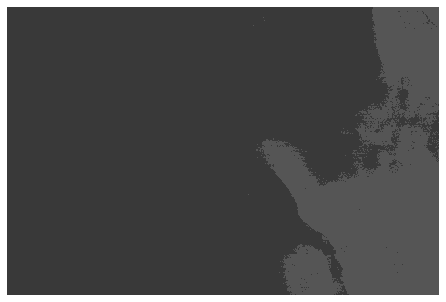

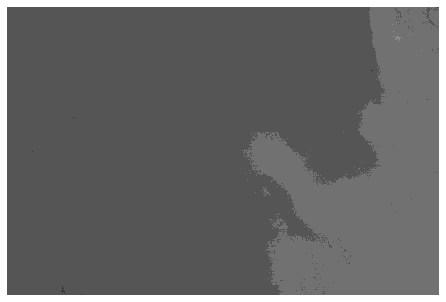

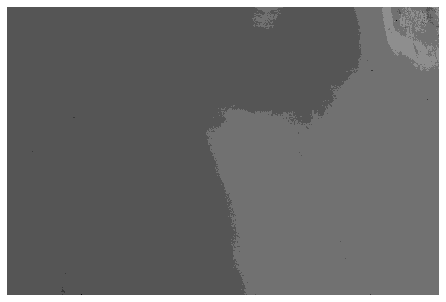

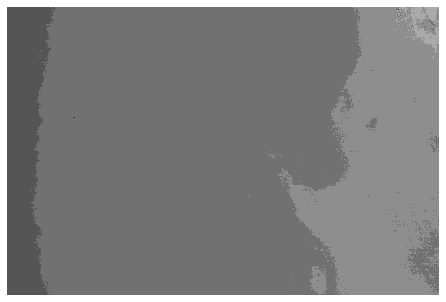

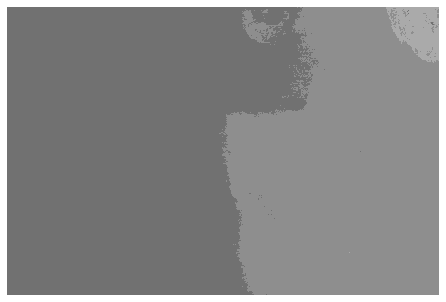

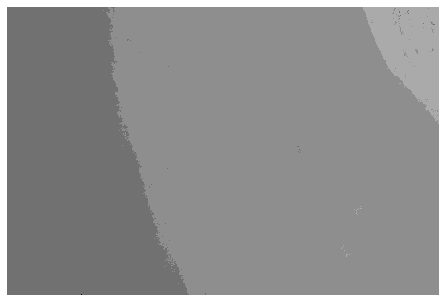

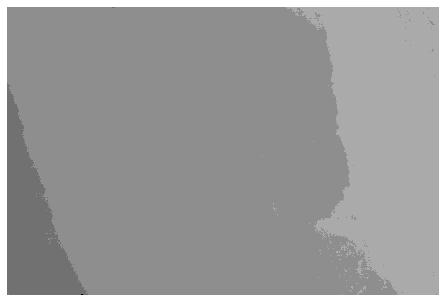

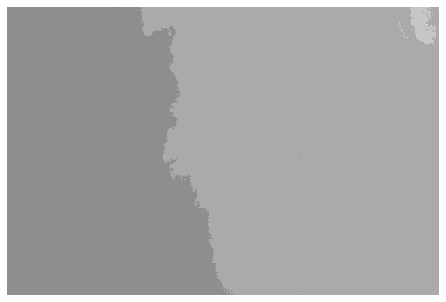

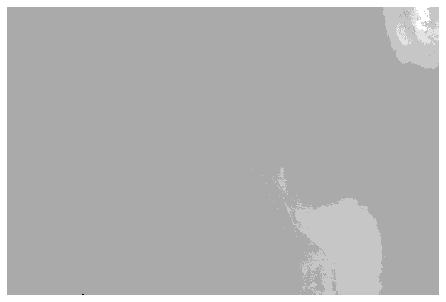

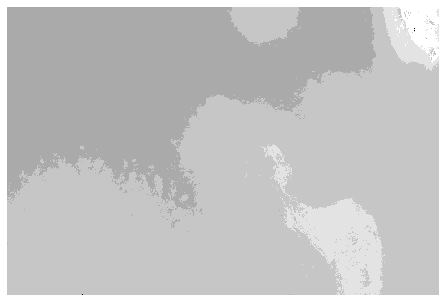

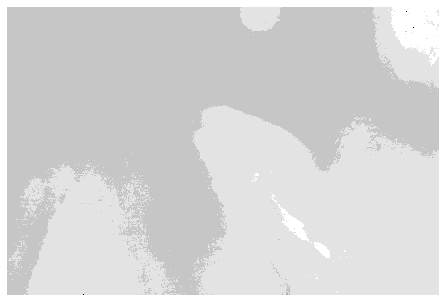

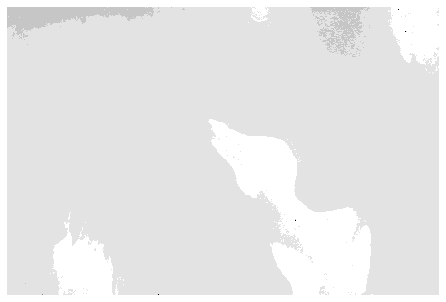

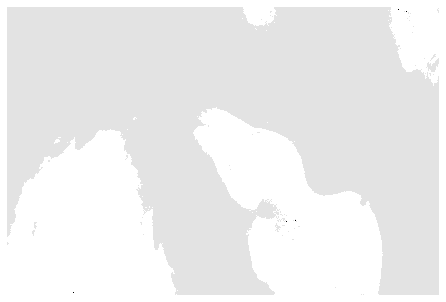

In [28]:
time_data = [100,125,130,150,160,190,220,250,280,310,340,375,400]
names = ['400ms','500ms','520ms','600ms','640ms','760ms','880ms','1000ms','1120ms','1240ms','1360ms','1500ms','1600ms']

count = 0
for i in time_data:
    a = im3d[:,i,:]  #3维数据切片
#     print(a.shape)
    a = np.reshape(a,(601,951))  #reshape
    fig = plot(a, vmin=vmin, vmax=vmax)  #绘图
    name=names[count] # 时间位置切片
    fig.savefig(os.path.join(save_path,name),transparent=True,dpi=300, pad_inches = 0)
    count = count+1